In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

In [12]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
model=None
model = tf.keras.models.Sequential([
    Flatten(input_shape=x_train[0].shape),
    BatchNormalization(),
    Dense(1000, activation=tf.nn.relu),
    Dense(500, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

In [15]:
N_ELEM = 25
N_EPOCHS = 100
VALIDATION_SIZE = 100
model.fit(
    x_train[:N_ELEM],
    y_train[:N_ELEM],
    epochs=N_EPOCHS,
    validation_data=(x_test[:VALIDATION_SIZE], y_test[:VALIDATION_SIZE]))

Train on 25 samples, validate on 100 samples
Epoch 1/100
25/25 [==============================] - 2s 87ms/sample - loss: 2.3112 - acc: 0.1600 - val_loss: 14.7398 - val_acc: 0.3300
Epoch 2/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.4251 - acc: 1.0000 - val_loss: 13.4793 - val_acc: 0.3800
Epoch 3/100
25/25 [==============================] - 0s 1ms/sample - loss: 0.0836 - acc: 1.0000 - val_loss: 13.7110 - val_acc: 0.3900
Epoch 4/100
25/25 [==============================] - 0s 1ms/sample - loss: 0.0207 - acc: 1.0000 - val_loss: 14.1971 - val_acc: 0.4100
Epoch 5/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.0059 - acc: 1.0000 - val_loss: 14.7464 - val_acc: 0.4300
Epoch 6/100
25/25 [==============================] - 0s 2ms/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 15.3457 - val_acc: 0.4400
Epoch 7/100
25/25 [==============================] - 0s 1ms/sample - loss: 7.7344e-04 - acc: 1.0000 - val_loss: 15.9793 - val_acc: 0.4400
Epoch 8/100


Epoch 60/100
25/25 [==============================] - 0s 1ms/sample - loss: 3.2902e-07 - acc: 1.0000 - val_loss: 35.3446 - val_acc: 0.4500
Epoch 61/100
25/25 [==============================] - 0s 2ms/sample - loss: 3.2902e-07 - acc: 1.0000 - val_loss: 35.6005 - val_acc: 0.4500
Epoch 62/100
25/25 [==============================] - 0s 1ms/sample - loss: 3.2902e-07 - acc: 1.0000 - val_loss: 35.8561 - val_acc: 0.4500
Epoch 63/100
25/25 [==============================] - 0s 1ms/sample - loss: 3.2902e-07 - acc: 1.0000 - val_loss: 36.1120 - val_acc: 0.4500
Epoch 64/100
25/25 [==============================] - 0s 1ms/sample - loss: 3.2902e-07 - acc: 1.0000 - val_loss: 36.3680 - val_acc: 0.4500
Epoch 65/100
25/25 [==============================] - 0s 2ms/sample - loss: 3.2902e-07 - acc: 1.0000 - val_loss: 36.6246 - val_acc: 0.4600
Epoch 66/100
25/25 [==============================] - 0s 2ms/sample - loss: 3.2425e-07 - acc: 1.0000 - val_loss: 36.8819 - val_acc: 0.4600
Epoch 67/100
25/25 [=======

In [16]:
EXPERIMENT_NUMBER = 12

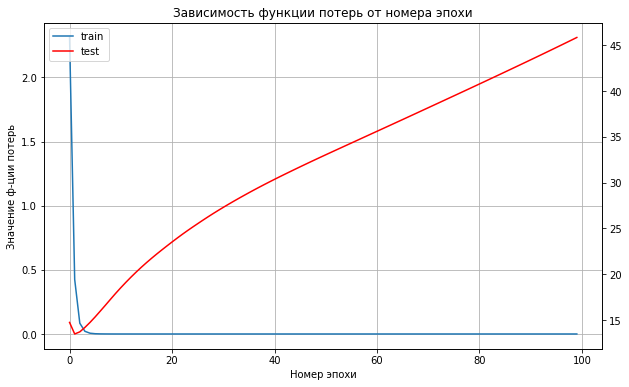

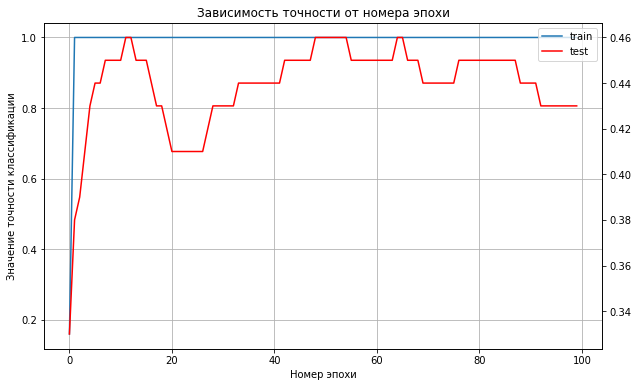

In [19]:
titles = {
    'loss': ["Зависимость функции потерь от номера эпохи", "Значение ф-ции потерь"],
    'acc': ["Зависимость точности от номера эпохи", "Значение точности классификации"],
    #'val_loss': ["Зависимость функции потерь (на test) от номера эпохи", "Значение ф-ции потерь"],
    #"val_acc": ["Зависимость точности (на test) от номера эпохи", "Значение точности классификации"]
}

for p in ('loss', 'acc'):
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax1.set(title=titles[p][0], ylabel=titles[p][1], xlabel="Номер эпохи")
    ax1.grid()
    line1, = ax1.plot(model.history.epoch, model.history.history[p])
    line2, = ax2.plot(model.history.epoch, model.history.history['val_'+p], color='r')
    #plt.savefig(p+'%d.png' % EXPERIMENT_NUMBER)
    plt.legend((line1, line2), ('train', 'test'))
    plt.show()
    
model.save('overtrained_%d.h5' % EXPERIMENT_NUMBER)

In [9]:
model = tf.keras.models.load_model('overtrained_11.h5')